<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

This notebook is used to read the evolution free simulation files of a single genotype. Here we plot a contour plots of cell number for (kappa,theta) values. Also, we have widget to observe the density distributions of each genotype.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.tri as tri
from IPython.display import Image, display, HTML, Video
import matplotlib.image as mpimg
from matplotlib import rcParams
import ipywidgets as widget
from glob import glob
from jupyterthemes import jtplot

In [2]:
final_cell_number = np.genfromtxt("output/Evolution Free 2/final_cell_number.csv", delimiter=',')
final_rest_cell_number = np.genfromtxt("output/Evolution Free 2/final_rest_cell_number.csv", delimiter=',')
final_vel_cell_number = np.genfromtxt("output/Evolution Free 2/final_vel_cell_number.csv", delimiter=',')
kappas = np.genfromtxt("output/Evolution Free 2/evolution_free_kappas.csv", delimiter=',')
thetas = np.genfromtxt("output/Evolution Free 2/evolution_free_thetas.csv", delimiter=',')
#kappas, thetas = np.meshgrid(np.arange(-8,8.4,0.4), np.arange(0,1.05,0.05))
total_runs = 441
strIDList = 10001 + np.arange(total_runs)

maxCells = max(final_cell_number)
maxCellsIndex = np.argmax(final_cell_number)
maxKappa = kappas[maxCellsIndex]
maxTheta = thetas[maxCellsIndex]
maxRestCells = max(final_rest_cell_number)
maxRestCellsIndex = np.argmax(final_rest_cell_number)
maxRestKappa = kappas[maxRestCellsIndex]
maxRestTheta = thetas[maxRestCellsIndex]
maxVelCells = max(final_vel_cell_number)
maxVelCellsIndex = np.argmax(final_vel_cell_number)
maxVelKappa = kappas[maxVelCellsIndex]
maxVelTheta = thetas[maxVelCellsIndex]

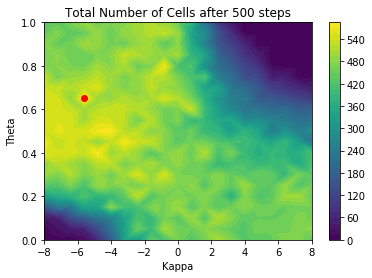

In [3]:
plt.tricontourf(kappas, thetas, final_cell_number, 50)
plt.colorbar()
plt.scatter(maxKappa,maxTheta,c='r')
plt.xlabel('Kappa')
plt.ylabel('Theta')
plt.title('Total Number of Cells after 500 steps')
plt.savefig('Total Cells 2(Total Time: 500)')

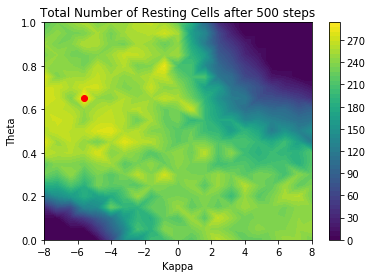

In [4]:
plt.tricontourf(kappas, thetas, final_rest_cell_number, 50)
plt.colorbar()
plt.scatter(maxRestKappa,maxRestTheta,c='r')
plt.xlabel('Kappa')
plt.ylabel('Theta')
plt.title('Total Number of Resting Cells after 500 steps')
plt.savefig('Total resting cells 2(Total Time: 500)')

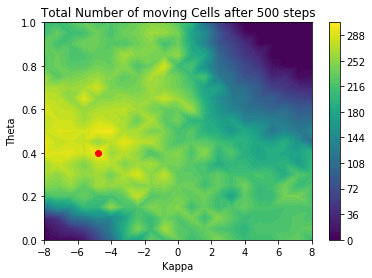

In [5]:
plt.tricontourf(kappas, thetas, final_vel_cell_number,50)
plt.colorbar()
plt.scatter(maxVelKappa,maxVelTheta,c='r')
plt.xlabel('Kappa')
plt.ylabel('Theta')
plt.title('Total Number of moving Cells after 500 steps')
plt.savefig('Total Moving Cells 2(Total Time: 500)')

In [6]:
kappa_int = np.array(((kappas+7.999)*21/16),dtype=np.uint)+1
theta_int = np.array(((thetas-0.001)*21),dtype=np.uint)+1
def plot_dens_mix(channel, kappa, theta):

    kappa_i = int((kappa+7.999)*21/16)+1
    theta_i = int((theta-0.001)*21)+1
    ID = np.array([(theta_int==theta_i) & (kappa_int==kappa_i)]).nonzero()[1][0]
    strID = str(10000+ID)
    directory = 'output/Evolution Free 2/' + strID
    if channel == 0:
        display(Image(filename=directory + '/density.jpg'))
        plt.show()
    elif channel == 1:
        display(Image(filename=directory + '/densityRest.jpg'))
        plt.show()
    elif channel == 2:
        display(Image(filename=directory +'/densityVelocity.jpg'))
        plt.show()

In [7]:
widget.interact(plot_dens_mix, channel=(0,2,1), kappa=(-8,8,0.4), theta=(0,1,0.05))

interactive(children=(IntSlider(value=1, description='channel', max=2), FloatSlider(value=0.0, description='ka…

<function __main__.plot_dens_mix(channel, kappa, theta)>